<a href="https://colab.research.google.com/github/YogendraRanga/Deep-Learning-projects/blob/main/internship_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'augmented-alzheimer-mri-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2492800%2F4229472%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T053414Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6eee86e1dbe0f19d2ef9e7cc19cac30cec2a66652b19830fce848bef1ec6a5a3b0f88f2e528dabda4388f0af385634b2bac380575813ec6e40439cfbc508c5a6bf095ff88a04407c31cd6e1d4850a8b42b19ab125aa5ff82b2bb56e25ada2b64c8745ffa4e36edd0a59cee632438b97e9118e4a57084483b1c502611e9c486a33932673c75dc5b282f3aa0a8b2bb406392f3765dc0fdc319fa50b9f14d7873a25f66c5e10165c5f2a308ef0c7e7fdb1843347eb849d5a783ed948f0976bd12d459cbf040a96b8bc51490840423a824a0cc06045c20b34354e63cda021cfe0cf49c9c303316072f28a5fb96e7f00e863af4a6a356c24b96081a2b1e3771db0ed7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 398281659 bytes downloaded
Downloaded and uncompressed: augmented-alzheimer-mri-dataset
Data source import complete.


In [ ]:
import cv2
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for train/test split



In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
import os
import pandas as pd

MildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented'

In [ ]:
filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
#         print(fpath)
        filepaths.append(fpath)
        labels.append(class_labels[i])
#         im = cv2.imread(fpath)
#         im = cv2.resize(im , (180,180))
#         features_augmented.append(im)

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
# print(Alzheimer_df["labels"].value_counts())

                                           filepaths         labels
0  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
1  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
2  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
3  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
4  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented


In [ ]:
Alzheimer_df['labels'].unique()

array(['Mild Demented', 'Moderate Demented', 'Non Demented',
       'Very MildDemented'], dtype=object)

In [ ]:
nondel_df=Alzheimer_df[Alzheimer_df['labels']=='Non Demented'].sample(3000,random_state=42)
non=pd.DataFrame(nondel_df)

In [ ]:
mild_df=Alzheimer_df[Alzheimer_df['labels']=='Mild Demented'].sample(3000,random_state=42)
mod=Alzheimer_df[Alzheimer_df['labels']=='Moderate Demented'].sample(3000,random_state=42)

In [ ]:
very=Alzheimer_df[Alzheimer_df['labels']=='Very MildDemented'].sample(3000,random_state=42)

In [ ]:
new_df=pd.concat([non,mild_df,mod,very],ignore_index=True)


In [ ]:
new_df.head()

filepaths        labels
0  /kaggle/input/augmented-alzheimer-mri-dataset/...  Non Demented
1  /kaggle/input/augmented-alzheimer-mri-dataset/...  Non Demented
2  /kaggle/input/augmented-alzheimer-mri-dataset/...  Non Demented
3  /kaggle/input/augmented-alzheimer-mri-dataset/...  Non Demented
4  /kaggle/input/augmented-alzheimer-mri-dataset/...  Non Demented

In [ ]:
new_df['labels'].value_counts()

labels
Non Demented         3000
Mild Demented        3000
Moderate Demented    3000
Very MildDemented    3000
Name: count, dtype: int64

In [ ]:
def load_data(image_paths, labels, image_size=(128, 128)):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
        img_resized = cv2.resize(img, image_size)    # Resize image
        images.append(img_resized)
    return np.array(images), np.array(labels)

In [ ]:
image_paths = new_df['filepaths']
labels = new_df['labels']

In [ ]:
images, labels = load_data(image_paths, labels)

In [ ]:
from skimage.feature import hog
def extract_hog_features(images):
    hog_features_list = []
    hog_images = []
    for image in images:
        features, hog_image = hog(image, block_norm='L2-Hys', pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        hog_features_list.append(features)
        hog_images.append(hog_image)
    return np.array(hog_features_list), np.array(hog_images)


In [ ]:
hog_features, hog_images = extract_hog_features(images)

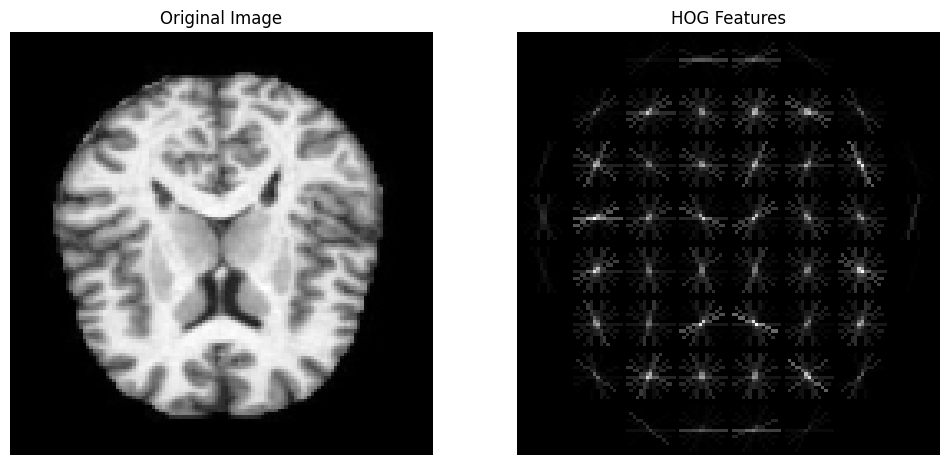

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(images[1], cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# HOG features image
ax[1].imshow(hog_images[1], cmap='gray')
ax[1].set_title('HOG Features')
ax[1].axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

import numpy as np


# Encode labels with LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
from sklearn.svm import SVC
model1=SVC(C=1.0,                  # Regularization parameter
    kernel='rbf',           # Radial Basis Function kernel
    gamma='scale',          # Kernel coefficient
    class_weight='balanced')
model1.fit(X_train_pca,y_train)

SVC(class_weight='balanced')

In [ ]:
model1.score(X_test_pca,y_test)

0.7966666666666666

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model1, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.7921875 , 0.809375  , 0.7890625 , 0.78541667, 0.7890625 ])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 7
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model1, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.79008746, 0.7893586 , 0.79810496, 0.80160467, 0.79431072,
       0.79212254, 0.80087527])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 9
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model1, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.79475164, 0.80037488, 0.83223993, 0.78350515, 0.80974695,
       0.79568885, 0.81801126, 0.7879925 , 0.80206379])

In [ ]:
y_pred=model1.predict(X_test_pca)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       624
           1       0.97      0.99      0.98       568
           2       0.74      0.71      0.73       612
           3       0.71      0.64      0.67       596

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.79      0.80      0.79      2400



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train_pca,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model2.score(X_test_pca,y_test)

0.67125

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model2, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.66041667, 0.68125   , 0.6640625 , 0.66614583, 0.65833333])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 7
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model2, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.68367347, 0.66253644, 0.6574344 , 0.63822028, 0.65791393,
       0.67031364, 0.65280817])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 9
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model2, X_train_pca, y_train, cv=kf)
cross_val_scores



array([0.66541706, 0.66166823, 0.68134958, 0.68978444, 0.66447985,
       0.68228679, 0.71388368, 0.66791745, 0.66041276])

In [ ]:
y_pred2=model2.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       624
           1       0.88      0.88      0.88       568
           2       0.60      0.61      0.61       612
           3       0.56      0.53      0.54       596

    accuracy                           0.67      2400
   macro avg       0.67      0.67      0.67      2400
weighted avg       0.67      0.67      0.67      2400



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(random_state=42,criterion='gini',
    splitter='best')
model3.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
model3.score(X_test_pca,y_test)

0.5058333333333334

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model3, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.51145833, 0.53333333, 0.54270833, 0.52083333, 0.51614583])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 7
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model3, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.51822157, 0.49052478, 0.51239067, 0.52370532, 0.51495259,
       0.51130562, 0.52224654])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 9
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model3, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.53701968, 0.50328022, 0.5257732 , 0.5398313 , 0.50984067,
       0.53139644, 0.55065666, 0.50844278, 0.51219512])

In [ ]:
y_pred3=model3.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.47      0.48      0.48       624
           1       0.75      0.74      0.74       568
           2       0.44      0.42      0.43       612
           3       0.39      0.39      0.39       596

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.51      0.51      0.51      2400



In [ ]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression(max_iter=10000)
model4.fit(X_train_pca,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model4.score(X_test_pca,y_test)

0.6595833333333333

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model4, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.66979167, 0.6859375 , 0.66927083, 0.6734375 , 0.665625  ])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 7
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model4, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.66763848, 0.68367347, 0.66982507, 0.66520788, 0.67177243,
       0.67104303, 0.67833698])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
k = 9
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model4, X_train_pca, y_train, cv=kf)
cross_val_scores

array([0.67666354, 0.67853796, 0.67291471, 0.66541706, 0.66729147,
       0.67291471, 0.68574109, 0.66604128, 0.65290807])

In [ ]:
y_pred4=model4.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       624
           1       0.89      0.94      0.92       568
           2       0.60      0.58      0.59       612
           3       0.52      0.48      0.50       596

    accuracy                           0.66      2400
   macro avg       0.66      0.66      0.66      2400
weighted avg       0.65      0.66      0.66      2400



applying grid search cv for svm

Deep Learning

In [ ]:
train_images, test_images = train_test_split(new_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(new_df, test_size=0.2, random_state=42)

In [ ]:
train_set.head()

filepaths             labels
9182   /kaggle/input/augmented-alzheimer-mri-dataset/...  Very MildDemented
11091  /kaggle/input/augmented-alzheimer-mri-dataset/...  Very MildDemented
6428   /kaggle/input/augmented-alzheimer-mri-dataset/...  Moderate Demented
288    /kaggle/input/augmented-alzheimer-mri-dataset/...       Non Demented
2626   /kaggle/input/augmented-alzheimer-mri-dataset/...       Non Demented

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
batch_size=32
img_size=(224,224)
image_generator = ImageDataGenerator(rescale=1/255., validation_split=0) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)
train_data = image_generator.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                                 shuffle=False,
                                                 target_size=img_size,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2)
validation_data= image_generator.flow_from_dataframe(batch_size=batch_size,
dataframe= val_set,x_col="filepaths", y_col="labels",                                                 shuffle=False,
                                                 target_size=img_size,
                                                 class_mode='categorical')


submission = image_generator.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                                 shuffle=False,
                                                subset="validation",
                                                 target_size=img_size,
                                                 class_mode='categorical')

Found 9600 validated image filenames belonging to 4 classes.
Found 2400 validated image filenames belonging to 4 classes.
Found 720 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Number of classes in your dataset
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(
    train_data,
    epochs=25,
    validation_data=validation_data
)

Epoch 1/25
300/300 [==============================] - 30s 73ms/step - loss: 1.2714 - accuracy: 0.3659 - val_loss: 0.9316 - val_accuracy: 0.5850
Epoch 2/25
300/300 [==============================] - 20s 66ms/step - loss: 0.8119 - accuracy: 0.6177 - val_loss: 0.7137 - val_accuracy: 0.6625
Epoch 3/25
300/300 [==============================] - 20s 68ms/step - loss: 0.6994 - accuracy: 0.6615 - val_loss: 0.6859 - val_accuracy: 0.6737
Epoch 4/25
300/300 [==============================] - 20s 65ms/step - loss: 0.6239 - accuracy: 0.7024 - val_loss: 0.5943 - val_accuracy: 0.7154
Epoch 5/25
300/300 [==============================] - 23s 75ms/step - loss: 0.5555 - accuracy: 0.7379 - val_loss: 0.5483 - val_accuracy: 0.7525
Epoch 6/25
300/300 [==============================] - 20s 66ms/step - loss: 0.4868 - accuracy: 0.7788 - val_loss: 0.4741 - val_accuracy: 0.7783
Epoch 7/25
300/300 [==============================] - 21s 71ms/step - loss: 0.4298 - accuracy: 0.8059 - val_loss: 0.4514 - val_accuracy:

In [ ]:
model.evaluate(submission)

23/23 [==============================] - 4s 172ms/step - loss: 0.6460 - accuracy: 0.8736


[0.6459786295890808, 0.8736110925674438]

In [ ]:
submission.reset()
predictions = model.predict(submission)
predicted_labels = np.argmax(predictions, axis=1)

23/23 [==============================] - 2s 78ms/step


In [ ]:
conf_matrix = confusion_matrix(submission.classes, predicted_labels)

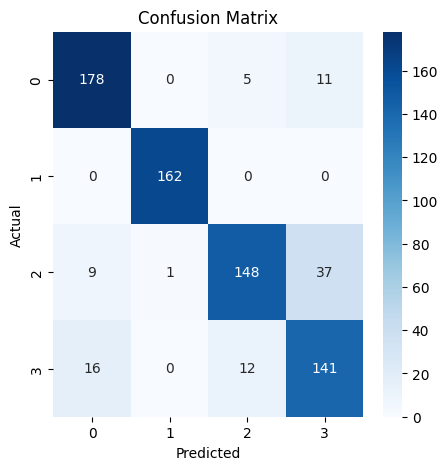

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predicted_labels

array([3, 1, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3, 2, 2, 0, 1, 2, 1, 2, 3, 3, 2,
       3, 3, 2, 3, 3, 0, 1, 0, 3, 1, 3, 3, 3, 0, 1, 2, 1, 3, 0, 3, 1, 3,
       0, 0, 0, 3, 1, 2, 0, 3, 1, 3, 3, 2, 0, 3, 3, 3, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 3, 0, 1, 3, 0, 0, 2, 1, 0, 3, 0, 2, 0, 1, 0, 1, 1, 3, 2,
       1, 0, 0, 3, 3, 3, 3, 2, 3, 3, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 3, 2,
       2, 2, 0, 0, 1, 0, 0, 3, 0, 3, 2, 2, 0, 3, 1, 2, 3, 0, 3, 2, 2, 3,
       3, 0, 0, 2, 0, 0, 3, 1, 3, 3, 2, 2, 1, 0, 0, 3, 2, 1, 2, 3, 3, 0,
       3, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 3, 1, 0, 3, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 3, 0, 3, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 1, 3, 3, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 3, 3, 3, 0,
       0, 3, 3, 1, 3, 1, 0, 0, 2, 1, 1, 3, 1, 0, 3, 3, 0, 0, 2, 1, 0, 0,
       3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0,
       0, 1, 3, 3, 2, 3, 1, 2, 2, 2, 0, 3, 0, 3, 3, 0, 2, 3, 0, 3, 2, 3,
       1, 0, 2, 3, 3, 1, 1, 3, 2, 2, 0, 2, 1, 2, 0,

In [ ]:
class_num=list(submission.class_indices.keys())
class_num

['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

In [ ]:
y_test =submission.classes
predictions = model.predict(submission)
y_pred = np.argmax(predictions,axis=1)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

23/23 [==============================] - 1s 48ms/step


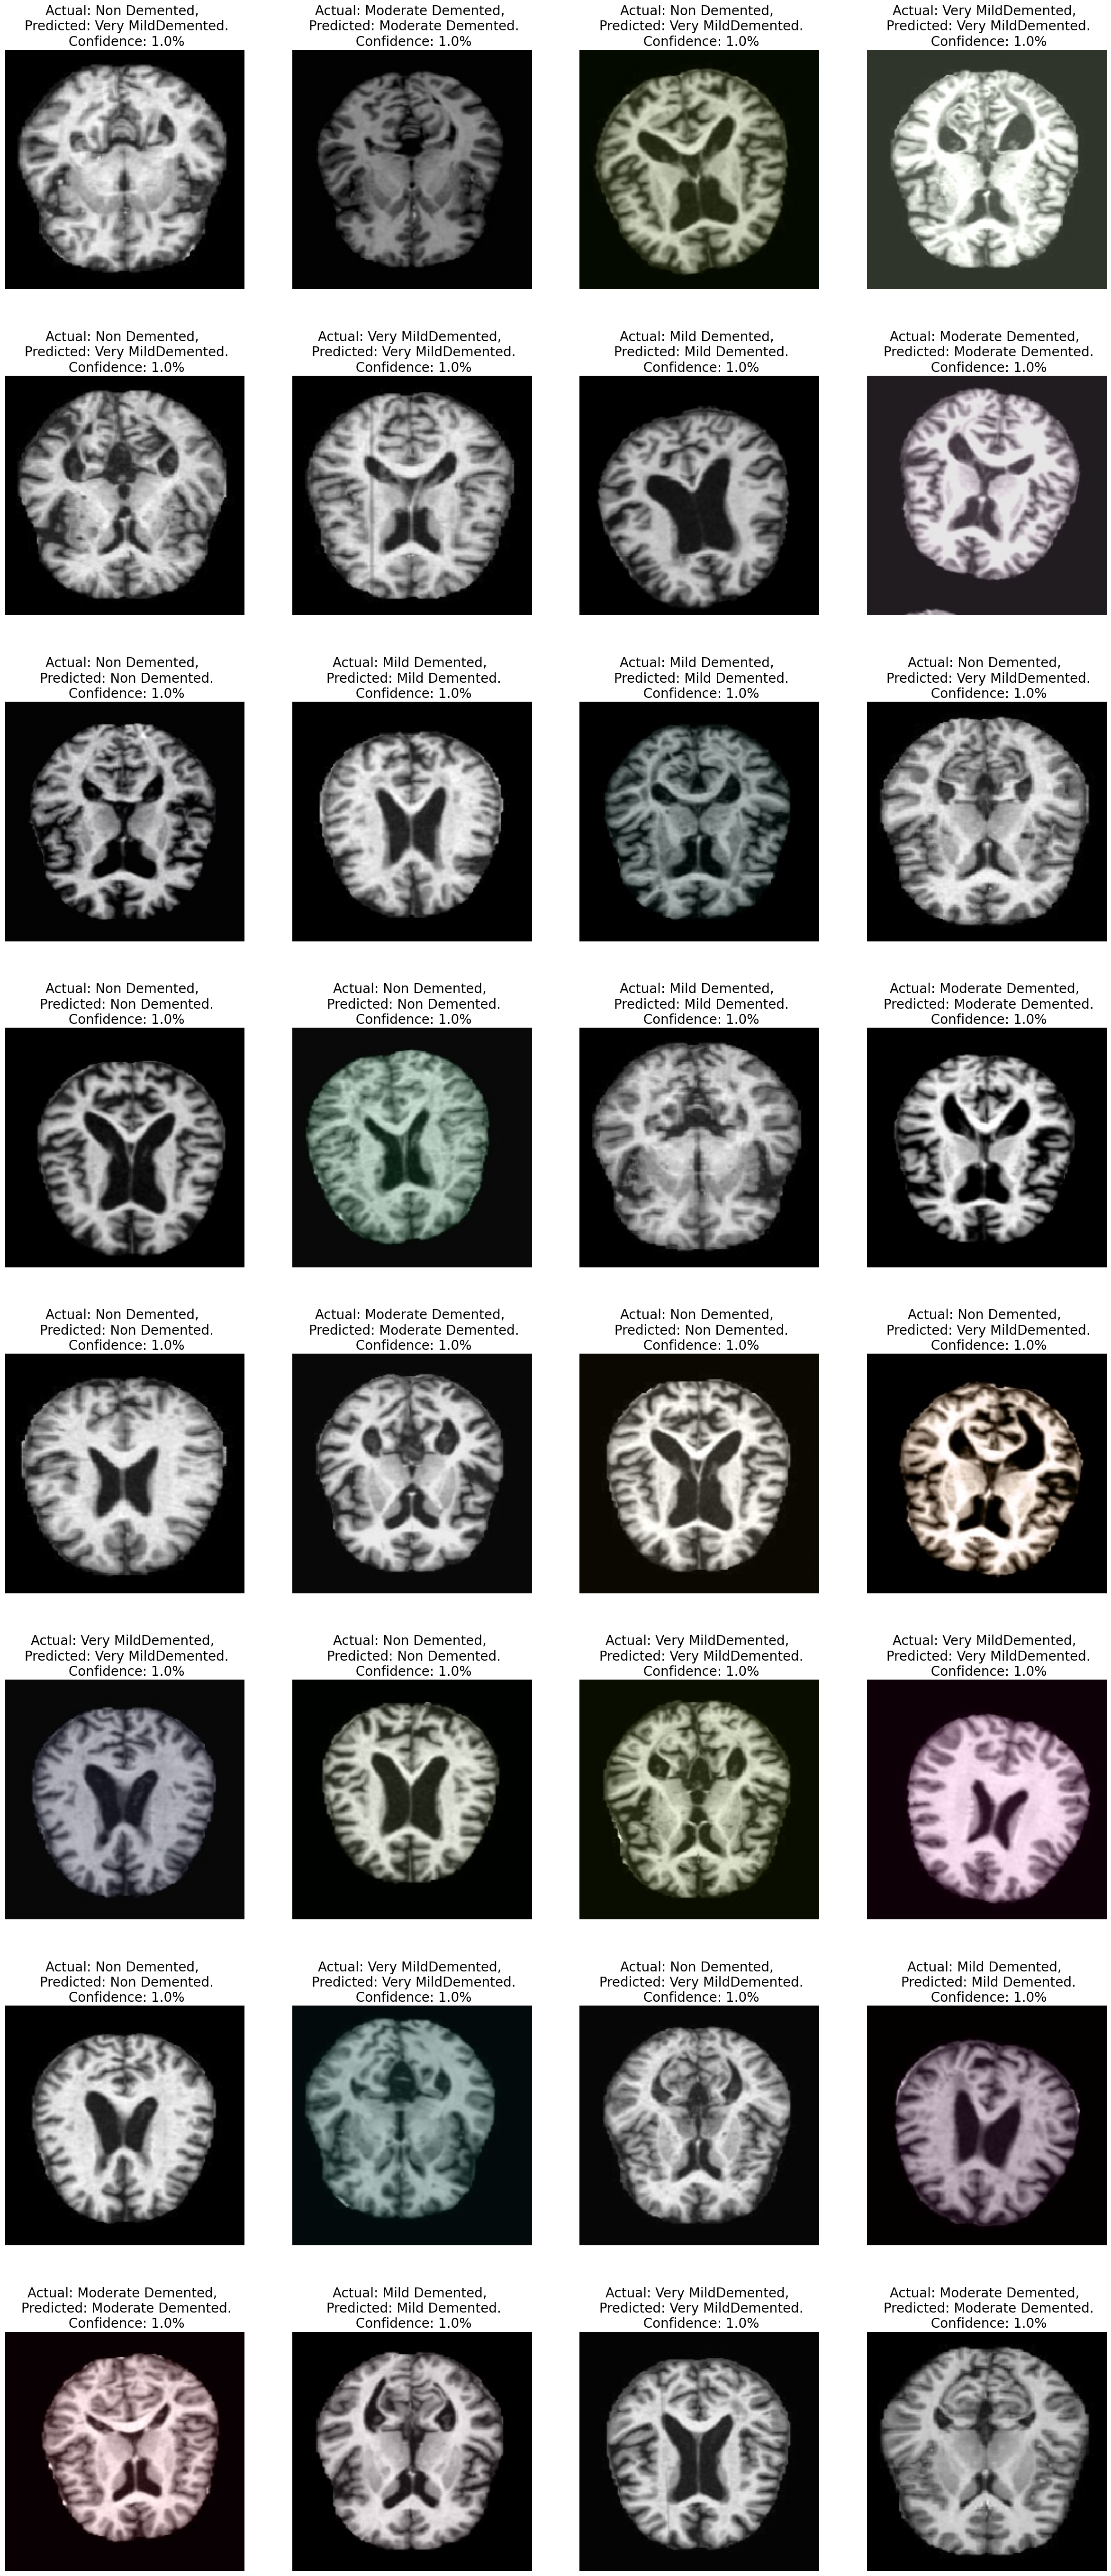

In [ ]:
plt.figure(figsize=(30,70))
batch = next(submission)
images= batch[0]
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(f"Actual: {class_num[y_test[n]]}, \n Predicted: {class_num[y_pred[n]]}.\n Confidence: {round(predictions[n][np.argmax(predictions[n])],0)}%",fontsize=20)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(submission.classes, predicted_labels,target_names=class_num))

                   precision    recall  f1-score   support

    Mild Demented       0.88      0.92      0.90       194
Moderate Demented       0.99      1.00      1.00       162
     Non Demented       0.90      0.76      0.82       195
Very MildDemented       0.75      0.83      0.79       169

         accuracy                           0.87       720
        macro avg       0.88      0.88      0.88       720
     weighted avg       0.88      0.87      0.87       720



Applying vgg16

In [ ]:
import keras
batch_size=32
epoch=25

callback= keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
vgg16 = VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)
for layer in vgg16.layers:
    layer.trainable = False
x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)
modelvgg16 = Model(inputs=vgg16.input, outputs=out)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)
modelvgg16.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#Summary
modelvgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
hist_vgg16=modelvgg16.fit(train_data, epochs=50, validation_data=validation_data, callbacks=callback)

Epoch 1/50
300/300 [==============================] - 53s 152ms/step - loss: 0.9054 - accuracy: 0.6367 - val_loss: 0.5841 - val_accuracy: 0.7563
Epoch 2/50
300/300 [==============================] - 47s 155ms/step - loss: 0.5354 - accuracy: 0.7720 - val_loss: 0.6917 - val_accuracy: 0.7038
Epoch 3/50
300/300 [==============================] - 48s 161ms/step - loss: 0.4360 - accuracy: 0.8206 - val_loss: 0.5207 - val_accuracy: 0.7688
Epoch 4/50
300/300 [==============================] - 47s 158ms/step - loss: 0.3478 - accuracy: 0.8637 - val_loss: 0.3697 - val_accuracy: 0.8575
Epoch 5/50
300/300 [==============================] - 48s 158ms/step - loss: 0.2638 - accuracy: 0.9051 - val_loss: 0.3519 - val_accuracy: 0.8650
Epoch 6/50
300/300 [==============================] - 49s 164ms/step - loss: 0.2194 - accuracy: 0.9211 - val_loss: 0.3793 - val_accuracy: 0.8504
Epoch 7/50
300/300 [==============================] - 47s 157ms/step - loss: 0.1895 - accuracy: 0.9305 - val_loss: 0.3648 - val_ac

In [ ]:
score, acc= modelvgg16.evaluate(submission)
print(score,acc)

23/23 [==============================] - 7s 313ms/step - loss: 0.2736 - accuracy: 0.9069
0.27364784479141235 0.9069444537162781


In [ ]:
submission.reset()
predictions = vgg16.predict(submission)
predicted_labels = np.argmax(predictions, axis=1)

23/23 [==============================] - 3s 121ms/step


In [ ]:
y_test =submission.classes
predictions = modelvgg16.predict(submission)
y_pred = np.argmax(predictions,axis=1)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

23/23 [==============================] - 3s 123ms/step


In [ ]:
print(classification_report(y_test,y_pred,target_names=class_num))

                   precision    recall  f1-score   support

    Mild Demented       0.96      0.91      0.93       194
Moderate Demented       1.00      1.00      1.00       162
     Non Demented       0.90      0.84      0.87       195
Very MildDemented       0.79      0.89      0.84       169

         accuracy                           0.91       720
        macro avg       0.91      0.91      0.91       720
     weighted avg       0.91      0.91      0.91       720



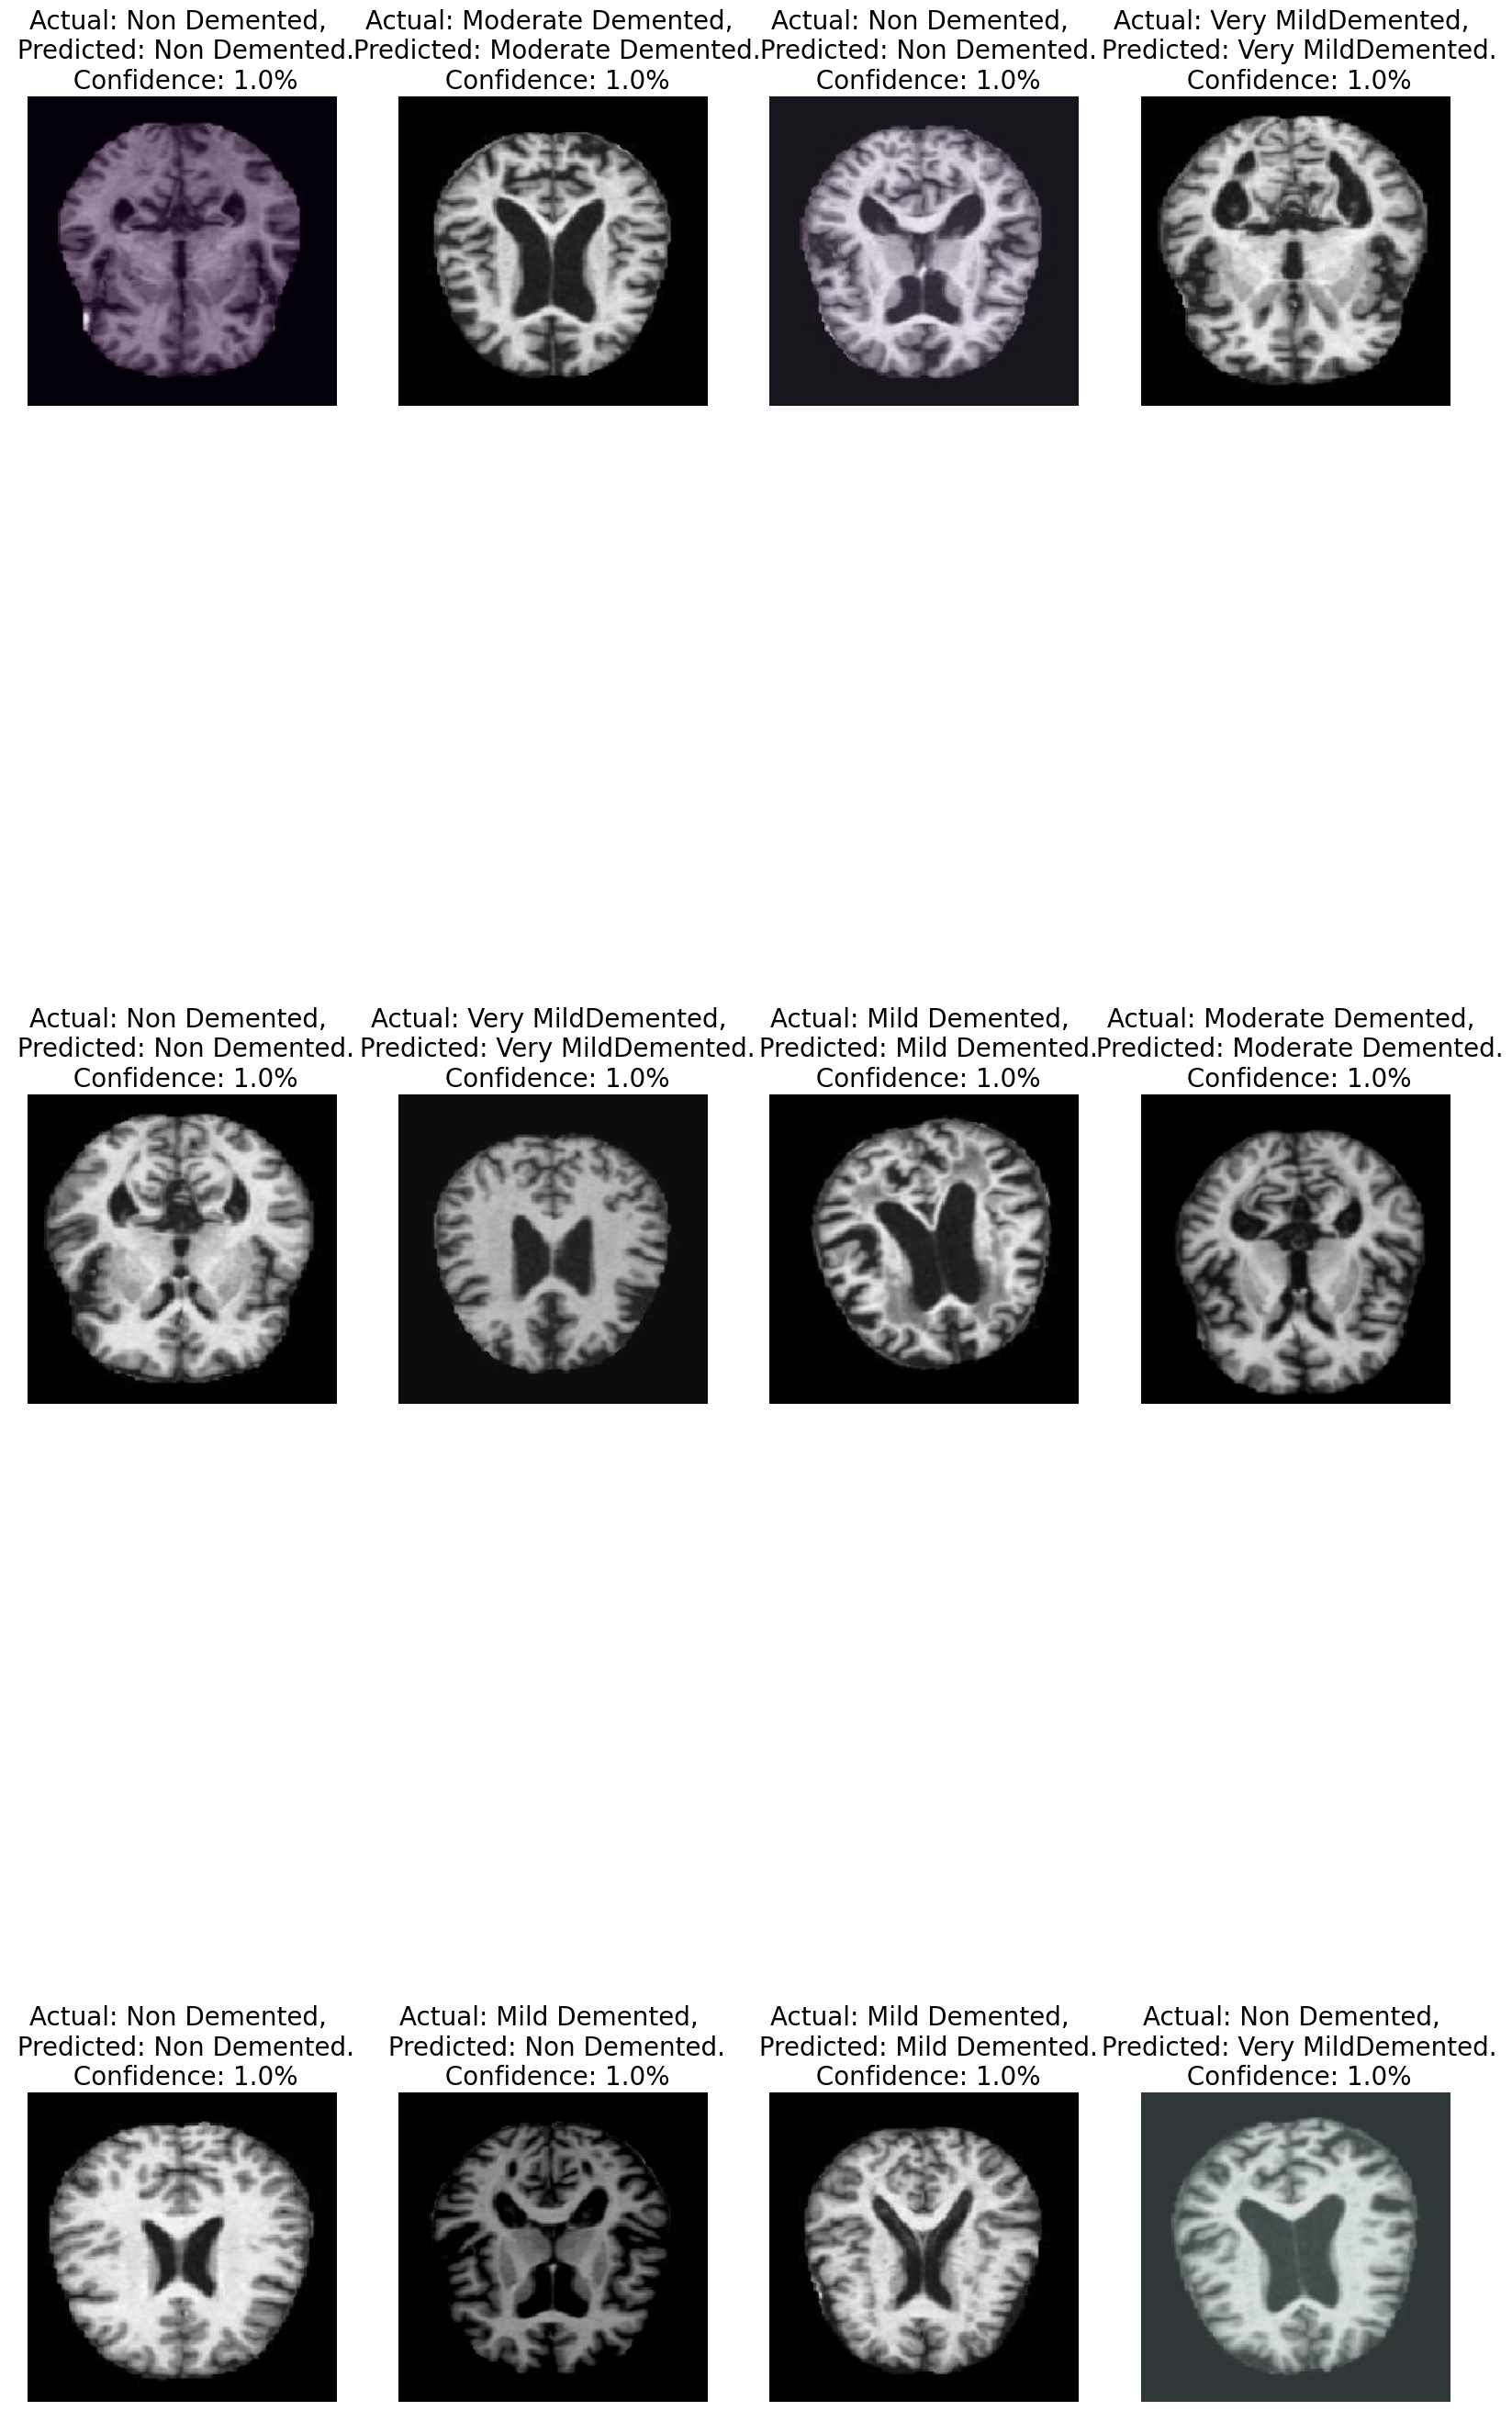

In [ ]:
plt.figure(figsize=(20,40))
batch = next(submission)
images= batch[0]
for n in range(12):
    plt.subplot(3,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(f"Actual: {class_num[y_test[n]]}, \n Predicted: {class_num[y_pred[n]]}.\n Confidence: {round(predictions[n][np.argmax(predictions[n])],0)}%",fontsize=20)

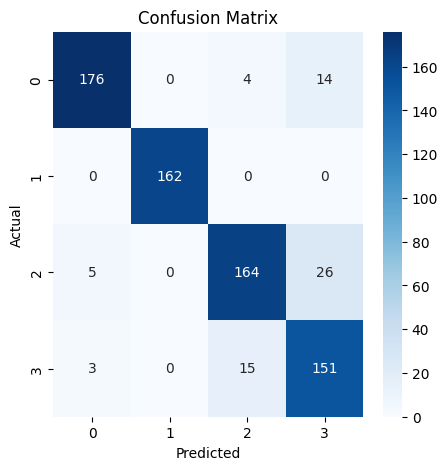

In [ ]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
hist_=pd.DataFrame(hist_vgg16.history)

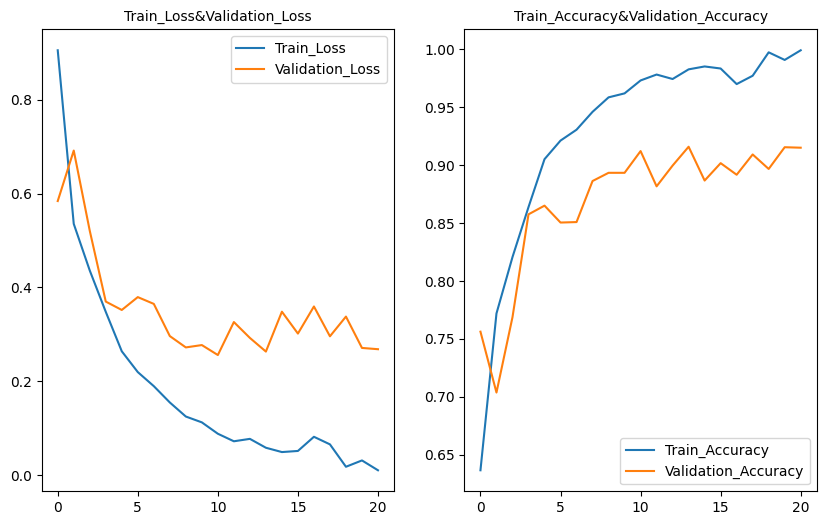

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss&Validation_Loss',fontsize=10)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy&Validation_Accuracy',fontsize=10)
plt.legend()
plt.show()